In [1]:
from pathlib import Path

import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

root_path = Path("../")
data_path = root_path / "data"
figures_path = Path("figures")

In [2]:
def prepare_dataset(dataset: pd.DataFrame) -> pd.DataFrame:
    dataset = dataset[dataset.User_Score != "tbd"]
    dataset["User_Score"] = dataset["User_Score"].astype("float")
    dataset.columns = [col.lower() for col in dataset.columns]
    dataset["year_of_release"] = pd.to_datetime(dataset["year_of_release"], format="%Y")
    return dataset

In [3]:
dataset_path = data_path / "dataset.csv"
df = pd.read_csv(dataset_path)
df = prepare_dataset(df)

/var/folders/jq/byk1x73j6pngqgl6my8tgyhm0000gn/T/ipykernel_79850/4005787621.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset["User_Score"] = dataset["User_Score"].astype("float")
/var/folders/jq/byk1x73j6pngqgl6my8tgyhm0000gn/T/ipykernel_79850/4005787621.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset["year_of_release"] = pd.to_datetime(dataset["year_of_release"], format="%Y")


In [4]:
df.head()

,name,platform,year_of_release,genre,publisher,na_sales,eu_sales,jp_sales,other_sales,global_sales,critic_score,critic_count,user_score,user_count,developer,rating
0,Wii Sports,Wii,2006-01-01,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8.0,322.0,Nintendo,E
1,Super Mario Bros.,NES,1985-01-01,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,NaN,NaN,NaN,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008-01-01,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,E
3,Wii Sports Resort,Wii,2009-01-01,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8.0,192.0,Nintendo,E
4,Pokemon Red/Pokemon Blue,GB,1996-01-01,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
df.dtypes

name                       object
platform                   object
year_of_release    datetime64[ns]
genre                      object
publisher                  object
na_sales                  float64
eu_sales                  float64
jp_sales                  float64
other_sales               float64
global_sales              float64
critic_score              float64
critic_count              float64
user_score                float64
user_count                float64
developer                  object
rating                     object
dtype: object

Let's analyse how global sales distributed in our dataset. To plot distributions using seaborn, we can use the `histplot` method.

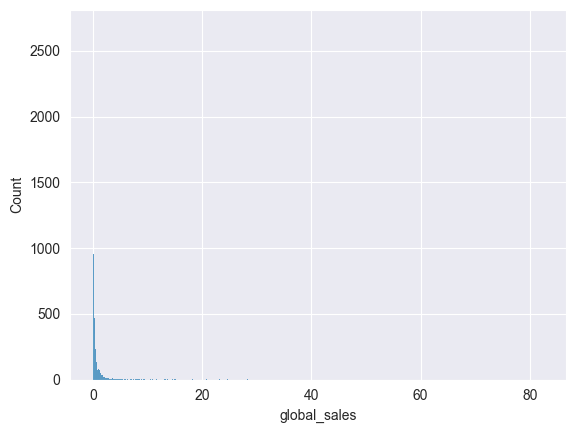

In [61]:
sns.histplot(data=df, x="global_sales")
plt.savefig(
    figures_path / "step_by_step_tutorial" / "step_0.png",
    dpi=300,
    bbox_inches="tight",
)

As we can see... we can see nothing. It's all because of very huge values which we have in our dataset. Let's firstly analyse them and then determine the range that we need.

In [62]:
df.global_sales.describe()

count    14294.000000
mean         0.592050
std          1.662656
min          0.010000
25%          0.060000
50%          0.190000
75%          0.540000
max         82.530000
Name: global_sales, dtype: float64

Yes, as we predicted, while the mean and std are about 0.6, 1, the maximum value is about 82! For further analysis let's select the values which lay in the range until 95 percentile (or quantile 0.95).



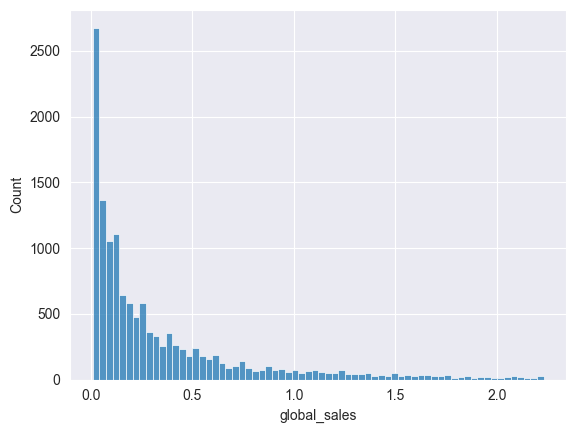

In [63]:
df_selected = df[df.global_sales <= df.global_sales.quantile(0.95)]
sns.histplot(data=df_selected, x="global_sales")

plt.savefig(
    figures_path / "step_by_step_tutorial" / "step_1.png",
    dpi=300,
    bbox_inches="tight",
)

While it's already looks understandable we can tune it a bit more with reducing number of bins:


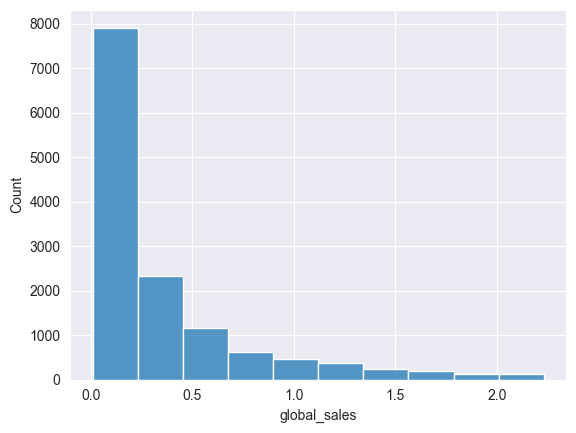

In [64]:
df_selected = df[df.global_sales <= df.global_sales.quantile(0.95)]
sns.histplot(data=df_selected, x="global_sales", bins=10)

plt.savefig(
    figures_path / "step_by_step_tutorial" / "step_2.png",
    dpi=300,
    bbox_inches="tight",
)

Great, we even can see a distribution. But besides determining the distribution type and its parameters, we can do nothing valuable here. Let's use the same techniques to compare distributions!

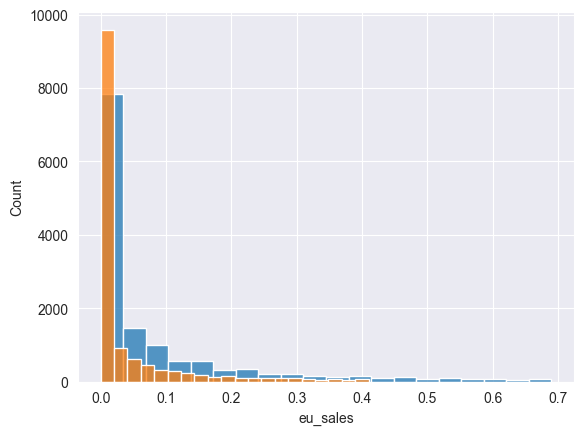

In [65]:
df_selected_eu = df[df.eu_sales <= df.eu_sales.quantile(0.95)]
sns.histplot(data=df_selected_eu, x="eu_sales", bins=20)

df_selected_jp = df[df.jp_sales <= df.jp_sales.quantile(0.95)]
sns.histplot(data=df_selected_jp, x="jp_sales", bins=20)

plt.savefig(
    figures_path / "step_by_step_tutorial" / "step_3.png",
    dpi=300,
    bbox_inches="tight",
)

In the figure above we just plot two distributions avobe each other. From the first side it could look ok, but here is an invisible problem: when we are plotting the counts, visually we can see difference, while in reality there is not difference in actual distributions. To avoid it, we can use proportions (probabilities) instead:

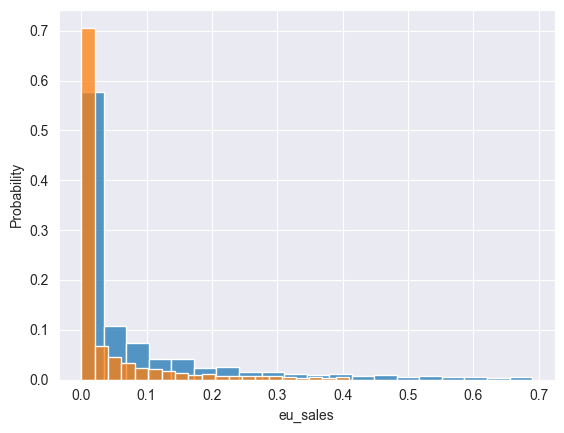

In [66]:
df_selected_eu = df[df.eu_sales <= df.eu_sales.quantile(0.95)]
sns.histplot(data=df_selected_eu, x="eu_sales", bins=20, stat="probability")

df_selected_jp = df[df.jp_sales <= df.jp_sales.quantile(0.95)]
sns.histplot(data=df_selected_jp, x="jp_sales", bins=20, stat="probability")

plt.savefig(
    figures_path / "step_by_step_tutorial" / "step_4.png",
    dpi=300,
    bbox_inches="tight",
)

Often, it could be much more easy to work with histograms if firstly preprocess the dataset. Let's reproduce the aforementioned example.

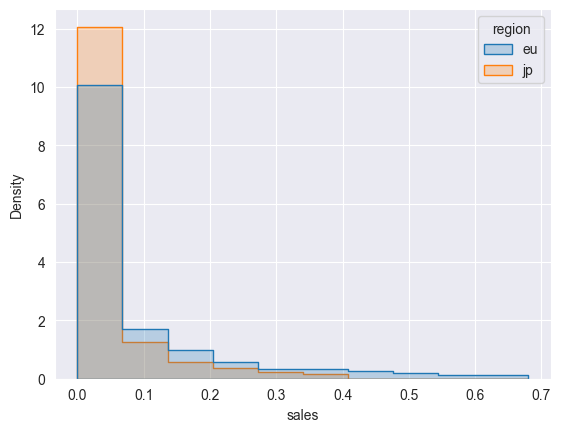

In [67]:
needed_regions = ("eu_sales", "jp_sales")
df_tmp = df[[col for col in df.columns if "sales" in col and col in needed_regions]]
df_melted = df_tmp.melt(var_name="region", value_name="sales")
df_melted["region"] = df_melted["region"].apply(lambda x: x.split("_")[0])

# Quantile filtering
thresholds = df_melted.groupby("region")["sales"].quantile(0.95)
result_df = pd.DataFrame()

for region, threshold in thresholds.items():
    filtered_df = df_melted[(df_melted["region"] == region) & (df_melted["sales"] < threshold)]
    result_df = pd.concat([result_df, filtered_df])


sns.histplot(
    data=result_df,
    x="sales",
    hue="region",
    bins=10,
    element="step",
    stat="density",
    common_norm=False,
)

plt.savefig(
    figures_path / "step_by_step_tutorial" / "step_5.png",
    dpi=300,
    bbox_inches="tight",
)

Also, as we discussed in the first week, distributions could be excellent addition to another visualization techniques to explain the data from another point of view

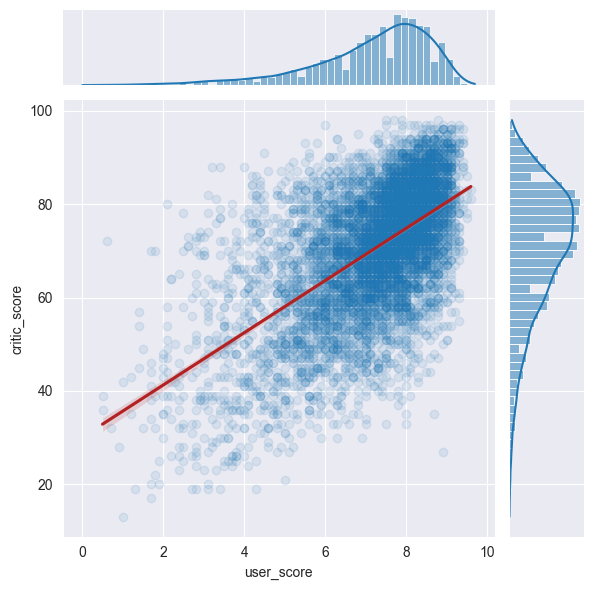

In [68]:
col1, col2 = "user_score", "critic_score"
sns.jointplot(
    data=df,
    x=col1,
    y=col2,
    kind="reg",
    joint_kws={
        "scatter_kws": {"alpha": 0.1},
        "line_kws": {"color": "firebrick"},
    },
)

plt.savefig(
    figures_path / "step_by_step_tutorial" / "step_6.png",
    dpi=300,
    bbox_inches="tight",
)